<a href="https://colab.research.google.com/github/Nusha97/Hyperparameter-Search-Optimization/blob/master/Hyperparameter_Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import nrrd
import matplotlib.pyplot as plt
import time

from skimage.morphology import disk, ball, erosion, dilation, opening, closing, remove_small_objects
from sklearn.metrics import f1_score, accuracy_score
from skimage.morphology import label
from skimage.io import imread, imsave
from skimage.measure import regionprops

# To keep track of the computation time
start = time.process_time()


In [0]:
# Computes the accuracy scores between the actual and the post processed model
def error_metric(file1, file2, val):  
    ir = file2[val]
    ii = file1[val]
    acc = f1_score(ir.reshape(-1,1), ii.reshape(-1,1), average='macro')    
    return acc

In [0]:
def pipeline(orig, gt, eq_d, area, disk_e, disk_d, disk_c, disk_o):
 
  
  cells_m = (orig == 2)*2
  bv_m = (orig == 1)*1
  axons_m = (orig == 3)*3

  cell_bv_find = cells_m+bv_m

  c_m = remove_small_objects(cell_bv_find, 5, 3)

  c_m_l = label(c_m, connectivity=3)

  cells_new = np.zeros(c_m_l.shape)

  r_m = regionprops(c_m_l)

  d_m = [r.equivalent_diameter for r in r_m]
  cell_label = [r.coords for r in r_m if r.equivalent_diameter < eq_d]

  bv_label = [r.coords for r in r_m if r.area > area]

  bv_new = np.zeros(c_m_l.shape)

  size = np.shape(cell_label)

  x_c = np.zeros(size[0])
  y_c = np.zeros(size[0])
  z_c = np.zeros(size[0])

  size = np.shape(bv_label)

  x_b = np.zeros(size[0])
  y_b = np.zeros(size[0])
  z_b = np.zeros(size[0])

  k = 0
  for i in bv_label:
    for j in i:
      x_b, y_b, z_b = j

      bv_new[x_b, y_b, z_b] = 1
      cell_bv_find[x_b, y_b, z_b] = 0

  bv_m_label = label(bv_m, connectivity=3)
  bv_m = remove_small_objects(bv_m_label, area, 3)
  bv_new = (bv_m > 0)*1

  k = 0
  for i in cell_label:
  
    for j in i:
      x_c, y_c, z_c = j
      cells_new[x_c, y_c, z_c] = 2
 
      if bv_new[x_c, y_c, z_c] == 1:
        cells_new[x_c, y_c, z_c] = 0

  strel = ball(disk_e)
  cells_new = erosion(cells_new, strel)

  strel = ball(disk_d)
  cells_new = dilation(cells_new, strel)

  strel = ball(disk_o)
  cells_new = opening(cells_new, strel)

  strel = ball(disk_c)
  cells_new = closing(cells_new, strel)

  model_out = cells_new + bv_new + axons_m

  # Change file path names if needed
  
  #nrrd.write("./Outputs/model_test_out.nrrd", model.astype('uint16'))
  #file1 = nrrd.read("./Outputs/model_test_out.nrrd")[0]
  #file2 = nrrd.read("./GroundTruth/annos_Striatum_3700_3957__500_757__110_471.nrrd")[0]
  output_metric = f1_score(model_out[60].reshape(-1, 1), gt[60].reshape(-1, 1), average='macro')  
  return model_out, output_metric

In [0]:
gt = nrrd.read("./Outputs/annos_Striatum_3700_3957__500_757__110_471.nrrd")[0]
#img = nrrd.read('./Outputs/img_Striatum_3700_3957__500_757__110_471.nrrd')[0]
orig = nrrd.read('./5Plane-etapoint05-UNet_Striatum_3700_3957__500_757__110_471.nrrd')[0]
 
#[model_out, out_metric] = pipeline(orig, gt, 15, 20, 2, 2, 2, 2)

#eq_d, area, disk_e, disk_d, disk_c, disk_o

In [0]:
k = 0
model_output = np.zeros((25, 361, 257, 257))
metric = np.zeros(14)
for i in range(8, 22):
  [model_output[k], metric[k]] = pipeline(orig, gt, i, 200, 1, 1, 1, 1)
  k = k+1 

NameError: ignored

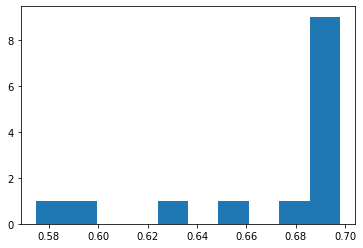

In [0]:
# Plot of the histogram of the F1 Scores 

plt.hist(metric, 10)

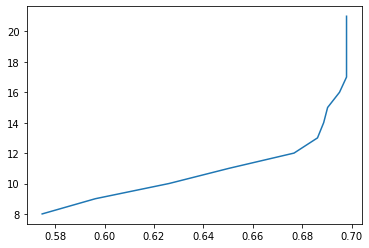

In [0]:
# Plot of the histogram of the F1 scores for the corresponding value of equivalent diameter

x = range(8, 22)
plt.plot(metric, x)